<h1>IMDb Movie Review Sentiment Analysis</h1>

## Section 1: Data Acquisition
In this section, we fetch movie reviews using IMDbPY.

In [17]:
from imdb import IMDb

def fetch_movie_reviews(movie_title):
    """
    Fetches movie reviews using IMDbPY.

    Args:
    - movie_title (str): The title of the movie to fetch reviews for.

    Returns:
    - reviews: List of movie reviews.
    """
    ia = IMDb()
    movies = ia.search_movie(movie_title)

    if not movies:
        return None  # Movie not found

    movie_id = movies[0].movieID
    movie = ia.get_movie(movie_id)
    ia.update(movie, 'reviews')

    reviews = movie.get('reviews')
    
    return reviews

# Fetching reviews for a movie
movie_title = "The Dark Knight"
fetched_reviews = fetch_movie_reviews(movie_title)


<h2>Section 2: Data Processing and Cleaning</h2>
We clean the reviews by removing HTML tags and special characters

In [19]:
from bs4 import BeautifulSoup
import re

def clean_reviews(reviews):
    """
    Cleans the fetched reviews.

    Args:
    - reviews: List of movie reviews.

    Returns:
    - cleaned_reviews: List of cleaned movie reviews.
    """
    cleaned_reviews = []
    for review in reviews:
        review_text = review['content']
        clean_text = BeautifulSoup(review_text, "html.parser").get_text()
        clean_text = re.sub(r'[^a-zA-Z\s]', '', clean_text)
        clean_text = clean_text.lower()
        cleaned_reviews.append(clean_text)
    return cleaned_reviews

# Cleaning fetched reviews
cleaned_reviews = clean_reviews(fetched_reviews)


<h2>Section 3: Sentiment Analysis Implementation</h2>
We use TextBlob for sentiment analysis on the cleaned reviews.

In [20]:
from textblob import TextBlob

def analyze_sentiment(reviews):
    """
    Performs sentiment analysis on cleaned reviews.

    Args:
    - reviews: List of cleaned movie reviews.

    Returns:
    - sentiments: List of sentiments (Positive, Negative, Neutral).
    """
    sentiments = []
    for review in reviews:
        analysis = TextBlob(review)
        if analysis.sentiment.polarity > 0:
            sentiments.append('Positive')
        elif analysis.sentiment.polarity < 0:
            sentiments.append('Negative')
        else:
            sentiments.append('Neutral')
    return sentiments

# Analyzing sentiment of cleaned reviews
sentiments = analyze_sentiment(cleaned_reviews)


<h2>Section 4: Results Visualization</h2>
We visualize the sentiment distribution using Matplotlib.

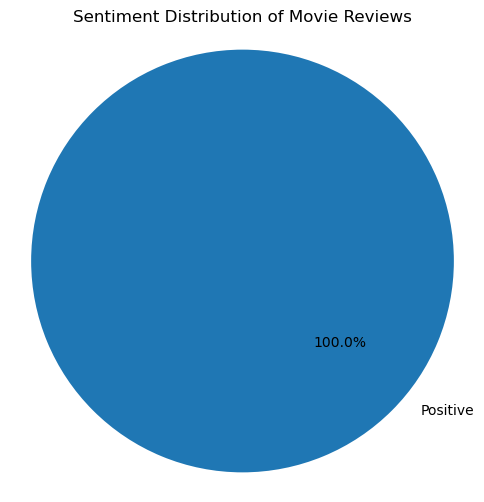

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

def visualize_sentiment(sentiments):
    """
    Visualizes sentiment distribution of reviews.

    Args:
    - sentiments: List of sentiments (Positive, Negative, Neutral).
    """
    sentiment_counts = pd.Series(sentiments).value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  
    plt.title('Sentiment Distribution of Movie Reviews')
    plt.show()

# Visualizing sentiment distribution
visualize_sentiment(sentiments)


<h2>Project Explanation: IMDb Movie Review Sentiment Analysis</h2>

<h3>Introduction</h3>
This project aims to conduct sentiment analysis on movie reviews fetched from IMDb using IMDbPY and analyze the sentiment distribution. Sentiment analysis helps understand the opinions, emotions, and attitudes expressed in textual data. The selected movie for this analysis is "The Dark Knight. about the movie.

<h3>Methodology</h3>

<h4>Data Acquisition</h4>
The IMDbPY library is utilized to search for the movie by title and fetch its reviews. If the movie is found, its reviews are collected for analysis.

<h4>Data Cleaning</h4>
The fetched reviews contain HTML tags and unwanted characters. Beautiful Soup is employed to remove HTML tags, and regular expressions are used to clean the text by eliminating special characters and converting it to lowercase for consistency.

<h4>Sentiment Analysis</h4>
TextBlob, a natural language processing library, is employed for sentiment analysis. Each cleaned review is processed, and sentiment polarity is assessed. Reviews are categorized as positive, negative, or neutral based on their polarity scores.

<h4>Results Visualization</h4>
The sentiments identified in the reviews are visualized using a pie chart generated with Matplotlib. The pie chart showcases the distribution of positive, negative, and neutral sentiments among the movie reviews.

<h3>Conclusion</h3>
This project provides insights into the overall sentiments expressed by IMDb reviewers for the movie "The Dark Knight." By examining sentiment distributions, it helps in understanding the general emotional tone conveyed in the reviews, aiding in assessing audience opinions about the movie.